# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('HRV.csv')

## Dataset Preprocessing

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
totChol_median = dataset['totChol'].median()
dataset['totChol'].fillna(totChol_median, inplace = True)

In [7]:
BMI_median = dataset['BMI'].median()
dataset['BMI'].fillna(BMI_median, inplace = True)

In [8]:
heartRate_median = dataset['heartRate'].median()
dataset['heartRate'].fillna(heartRate_median, inplace = True)

In [9]:
glucose_median = dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median, inplace = True)

In [10]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [11]:
x = dataset.drop('totChol', axis = 1)
y = dataset[['totChol']]

In [12]:
x.sample()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3910,0,56,0,173.0,98.5,21.88,62.0,76.0,0


In [13]:
y.sample()

,totChol
3839,218.0


## Splitting the dataset into the Training set and Test set

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 20)

## Training the Linear Regression model 

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regressor = LinearRegression()
regressor.fit(x_train.values, y_train)

LinearRegression()

## Model performance check- R Square and RMSE score

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [63]:
y_pred = regressor.predict(x_test.values)
y_pred[:5]

array([[222.69286556],
       [228.66347905],
       [218.37300516],
       [231.56227035],
       [253.20818655]])

In [64]:
y_test.head()

,totChol
2485,201.0
1056,271.0
2383,228.0
4089,229.0
675,156.0


In [65]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.10450337100360774


In [66]:
print('RMSE:', math.sqrt((mean_squared_error(y_test, y_pred))))

RMSE: 42.675824968734624


## Predicting new results where the actual results are given
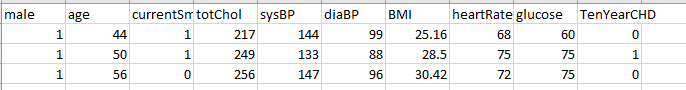
- predict total cholesterol

In [26]:
# case 1 actual 217
regressor.predict([[1, 44, 1, 144, 99, 25.16, 68, 60, 0]])
# actual: 217
# predicted: 229.24

array([[229.23999306]])

In [28]:
# case 2 actual 249
regressor.predict([[1, 50, 1, 133, 88, 28.5, 75, 75, 1]])
# actual: 249
# predicted: 238.59

array([[238.58906189]])

In [30]:
# case 3 actual 256
regressor.predict([[1, 56, 0, 147, 96, 30.42, 72, 75, 0]])
# actual: 256
# predicted: 244.47

array([[244.46564034]])

### Discuss the results

These results show that Linear Regression for this model is not very accurate. The model only had a 10% accuracy score, which was the highest when the test size and random state were changed. The predictions were still similar to the actual values, but they tended to be off by quite a bit from the actual total cholesterol. The accuracy score is not high enough for this to be considered a good model since the R2 score is extremely low. The RMSE score is pretty low, meaning that there was not a huge difference between the actual and predicted values, although the model still did not train well because of the 10% accuracy R2 score.

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [31]:
X = dataset.drop('TenYearCHD', axis = 1)
Y = dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Training the Logistic Regression model 

In [33]:
from sklearn.linear_model import LogisticRegression

In [38]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train.values, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [41]:
Y_pred = classifier.predict(X_test.values)
Y_pred[:5]

array([0, 0, 0, 0, 0])

In [42]:
Y_test.head()

,TenYearCHD
1173,1
2236,0
1578,0
594,0
3076,0


In [44]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[730   5]
 [108   4]]


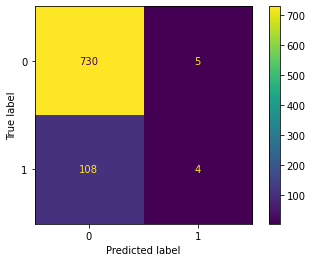

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

In [46]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       735
           1       0.44      0.04      0.07       112

    accuracy                           0.87       847
   macro avg       0.66      0.51      0.50       847
weighted avg       0.81      0.87      0.81       847



## Predicting new results where the actual results are given
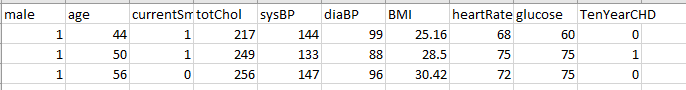

In [40]:
print(classifier.predict([[1, 44, 1, 217, 144, 99, 25.16 ,68, 60]]))
# No, this person is not at risk of Coronary Heart Disease
# The actual and the predicted values are the same.

[0]


In [41]:
print(classifier.predict([[1, 50, 1, 249, 133, 88, 28.5, 75, 75]]))
# No, this person is not at risk of Coronary Heart Disease
# This prediction is not the actual value, 
# meaning that it predicts the person is not at risk when they are.

[0]


In [42]:
print(classifier.predict([[1, 56, 0, 256, 147, 96, 30.42, 72, 75]]))
# No, this person is not at risk of Coronary Heart Disease
# The actual and the predicted values are the same.

[0]


### Discuss the results

The Logistic Regression model for the heart dataset was way more accurate than the Linear Regression model. The accuracy score was extremely high, but not perfect, at a 87% f1-score accuracy. This can be seen with the predictions because it correctly predicted when a person had a 0, or was not at risk of CHD, and incorrectly predicted when a person had a 1, or was at risk of CHD. This makes sense because the model is extremely better at predicting 0's then it is at predicting 1's. The f1-score for 0's was 93% and the f1-score for 1's was 7%. This is a huge difference that shows the model is better at predicting 0's than 1's. This might be because there are a lot more 0's (735) than 1's (112). Overall, the model is still really good at 87% accuracy.

### Summary

The Logisitic Regression model was more accurate than the Linear Regression model because Logistic Regression had an 87% accuracy while Linear Regression had a 10% accuracy. With this being said, Logisitic Regression did a much better job at predicting 0's than 1's, meaning that it was really good at predicting if a person was not at risk of CHD, but bad at predicting is a person had CHD. This is possibly because there were a lot more 0's in the model, with 735 values, than 1's, with 112 values. This can be seen in the prediction section because it did well predicting 0's but not 1's. This is still better than the Linear Regression model because it had a low RMSE score, but it did not train well with an extremely low accuracy score. This shows that Logistic Regression is the best fit for this dataset. In order for this dataset to train better and raise the accuracy score, there needs to be a better distribution with a more even amount of 0's and 1's. If this was the case, then the model would be able to train better and the accuracy score would become higher.